In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# **1. Overview**

In [3]:
dataset = pd.read_csv("dementia_patients_health_data.csv")

In [4]:
dataset.head()

Diabetic  AlcoholLevel  HeartRate  BloodOxygenLevel  BodyTemperature  \
0         1      0.084974         98         96.230743        36.224852   
1         0      0.016973         78         93.032122        36.183874   
2         0      0.009000         89         93.566504        37.326321   
3         0      0.086437         60         93.906510        37.030620   
4         1      0.150747         67         97.508994        36.062121   

      Weight  MRI_Delay Prescription  Dosage in mg  Age  ...  Smoking_Status  \
0  57.563978  36.421028          NaN           NaN   60  ...  Current Smoker   
1  56.832335  31.157633  Galantamine          12.0   61  ...   Former Smoker   
2  59.759066  37.640435          NaN           NaN   69  ...   Former Smoker   
3  58.266471  50.673992    Donepezil          23.0   78  ...    Never Smoked   
4  67.705027  27.810601    Memantine          20.0   77  ...    Never Smoked   

    APOE_ε4  Physical_Activity Depression_Status Cognitive_Test_Scores  \
0  Negative          Sedentary                No                    10   
1  Positive  Moderate Activity                No                     1   
2  Negative  Moderate Activity                No                     8   
3  Negative      Mild Activity               Yes                     5   
4  Positive      Mild Activity                No                     0   

  Medication_History      Nutrition_Diet Sleep_Quality  \
0                 No       Low-Carb Diet          Poor   
1                Yes       Low-Carb Diet          Poor   
2                 No  Mediterranean Diet          Poor   
3                Yes       Balanced Diet          Poor   
4                Yes       Low-Carb Diet          Good   

   Chronic_Health_Conditions Dementia  
0                   Diabetes        0  
1              Heart Disease        1  
2              Heart Disease        0  
3               Hypertension        1  
4                   Diabetes        1  

[5 rows x 24 columns]

In [5]:
dataset.shape

(1000, 24)

In [6]:
dataset.columns

Index(['Diabetic', 'AlcoholLevel', 'HeartRate', 'BloodOxygenLevel',
       'BodyTemperature', 'Weight', 'MRI_Delay', 'Prescription',
       'Dosage in mg', 'Age', 'Education_Level', 'Dominant_Hand', 'Gender',
       'Family_History', 'Smoking_Status', 'APOE_ε4', 'Physical_Activity',
       'Depression_Status', 'Cognitive_Test_Scores', 'Medication_History',
       'Nutrition_Diet', 'Sleep_Quality', 'Chronic_Health_Conditions',
       'Dementia'],
      dtype='object')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diabetic                   1000 non-null   int64  
 1   AlcoholLevel               1000 non-null   float64
 2   HeartRate                  1000 non-null   int64  
 3   BloodOxygenLevel           1000 non-null   float64
 4   BodyTemperature            1000 non-null   float64
 5   Weight                     1000 non-null   float64
 6   MRI_Delay                  1000 non-null   float64
 7   Prescription               485 non-null    object 
 8   Dosage in mg               485 non-null    float64
 9   Age                        1000 non-null   int64  
 10  Education_Level            1000 non-null   object 
 11  Dominant_Hand              1000 non-null   object 
 12  Gender                     1000 non-null   object 
 13  Family_History             1000 non-null   object

In [8]:
dataset['Diabetic'] = dataset['Diabetic'].astype('object')

In [9]:
#for numerical features
display(dataset.describe().round(3))

AlcoholLevel  HeartRate  BloodOxygenLevel  BodyTemperature    Weight  \
count      1000.000   1000.000          1000.000         1000.000  1000.000   
mean          0.098     79.383            95.226           36.762    74.321   
std           0.059     12.108             2.929            0.432    14.464   
min           0.000     60.000            90.011           36.002    50.070   
25%           0.046     68.000            92.875           36.395    61.387   
50%           0.098     79.000            95.390           36.784    74.149   
75%           0.152     90.000            97.785           37.127    87.024   
max           0.200    100.000            99.999           37.497    99.983   

       MRI_Delay  Dosage in mg       Age  Cognitive_Test_Scores  Dementia  
count   1000.000       485.000  1000.000               1000.000  1000.000  
mean      30.104         9.213    74.908                  6.383     0.485  
std       16.862         6.493     9.095                  3.181     0.500  
min        0.095         1.500    60.000                  0.000     0.000  
25%       16.237         4.000    67.000                  4.000     0.000  
50%       29.577         8.000    75.000                  8.000     0.000  
75%       44.177        12.000    83.000                  9.000     1.000  
max       59.958        23.000    90.000                 10.000     1.000

In [10]:
#for categorical features
display(dataset.describe(include=['object']).round(3).T)

count unique                 top freq
Diabetic                   1000      2                   1  513
Prescription                485      4           Memantine  128
Education_Level            1000      4      Primary School  389
Dominant_Hand              1000      2                Left  519
Gender                     1000      2              Female  504
Family_History             1000      2                 Yes  520
Smoking_Status             1000      3       Former Smoker  458
APOE_ε4                    1000      2            Positive  694
Physical_Activity          1000      3       Mild Activity  351
Depression_Status          1000      2                  No  755
Medication_History         1000      2                 Yes  514
Nutrition_Diet             1000      3  Mediterranean Diet  338
Sleep_Quality              1000      2                Poor  534
Chronic_Health_Conditions   821      3            Diabetes  513

# **2. Data Cleaning**

In [19]:
sub_dataset = dataset[[
    'Diabetic', 'AlcoholLevel', 'HeartRate', 'BloodOxygenLevel',
    'BodyTemperature', 'Weight', 'MRI_Delay', 'Prescription',
    'Dosage in mg', 'Age', 'Education_Level', 'Dominant_Hand', 'Gender',
    'Family_History', 'Smoking_Status', 'APOE_ε4', 'Physical_Activity',
    'Depression_Status', 'Cognitive_Test_Scores', 'Medication_History',
    'Nutrition_Diet', 'Sleep_Quality', 'Chronic_Health_Conditions',
    'Dementia'
]].copy()

In [22]:
sub_dataset

Diabetic  AlcoholLevel  HeartRate  BloodOxygenLevel  BodyTemperature  \
0          1      0.084974         98         96.230743        36.224852   
1          0      0.016973         78         93.032122        36.183874   
2          0      0.009000         89         93.566504        37.326321   
3          0      0.086437         60         93.906510        37.030620   
4          1      0.150747         67         97.508994        36.062121   
..       ...           ...        ...               ...              ...   
995        1      0.081825         87         93.851963        36.495134   
996        1      0.145249         97         94.522391        36.270804   
997        1      0.073692         65         98.578388        37.065703   
998        0      0.037347         71         91.298580        37.037202   
999        0      0.085969         90         95.522825        36.026748   

        Weight  MRI_Delay Prescription  Dosage in mg  Age  ...  \
0    57.563978  36.421028          NaN           NaN   60  ...   
1    56.832335  31.157633  Galantamine          12.0   61  ...   
2    59.759066  37.640435          NaN           NaN   69  ...   
3    58.266471  50.673992    Donepezil          23.0   78  ...   
4    67.705027  27.810601    Memantine          20.0   77  ...   
..         ...        ...          ...           ...  ...  ...   
995  50.380106  42.318663    Donepezil          10.0   88  ...   
996  94.006484  52.812568          NaN           NaN   80  ...   
997  80.088613  13.640229          NaN           NaN   67  ...   
998  95.322210  17.445715    Memantine          20.0   62  ...   
999  57.671455  30.011838          NaN           NaN   80  ...   

     Smoking_Status   APOE_ε4  Physical_Activity Depression_Status  \
0    Current Smoker  Negative          Sedentary                No   
1     Former Smoker  Positive  Moderate Activity                No   
2     Former Smoker  Negative  Moderate Activity                No   
3      Never Smoked  Negative      Mild Activity               Yes   
4      Never Smoked  Positive      Mild Activity                No   
..              ...       ...                ...               ...   
995    Never Smoked  Positive      Mild Activity                No   
996    Never Smoked  Negative  Moderate Activity                No   
997    Never Smoked  Positive          Sedentary                No   
998    Never Smoked  Positive          Sedentary               Yes   
999    Never Smoked  Positive      Mild Activity                No   

    Cognitive_Test_Scores Medication_History      Nutrition_Diet  \
0                      10                 No       Low-Carb Diet   
1                       1                Yes       Low-Carb Diet   
2                       8                 No  Mediterranean Diet   
3                       5                Yes       Balanced Diet   
4                       0                Yes       Low-Carb Diet   
..                    ...                ...                 ...   
995                     5                 No       Balanced Diet   
996                     9                Yes       Low-Carb Diet   
997                     8                Yes       Balanced Diet   
998                     2                 No       Low-Carb Diet   
999                    10                Yes  Mediterranean Diet   

    Sleep_Quality  Chronic_Health_Conditions Dementia  
0            Poor                   Diabetes        0  
1            Poor              Heart Disease        1  
2            Poor              Heart Disease        0  
3            Poor               Hypertension        1  
4            Good                   Diabetes        1  
..            ...                        ...      ...  
995          Poor                   Diabetes        1  
996          Poor                   Diabetes        0  
997          Good                   Diabetes        0  
998          Good                        NaN        1  
999          Good       

In [25]:
sub_dataset.isnull().sum()

Diabetic                       0
AlcoholLevel                   0
HeartRate                      0
BloodOxygenLevel               0
BodyTemperature                0
Weight                         0
MRI_Delay                      0
Prescription                 515
Dosage in mg                 515
Age                            0
Education_Level                0
Dominant_Hand                  0
Gender                         0
Family_History                 0
Smoking_Status                 0
APOE_ε4                        0
Physical_Activity              0
Depression_Status              0
Cognitive_Test_Scores          0
Medication_History             0
Nutrition_Diet                 0
Sleep_Quality                  0
Chronic_Health_Conditions    179
Dementia                       0
dtype: int64

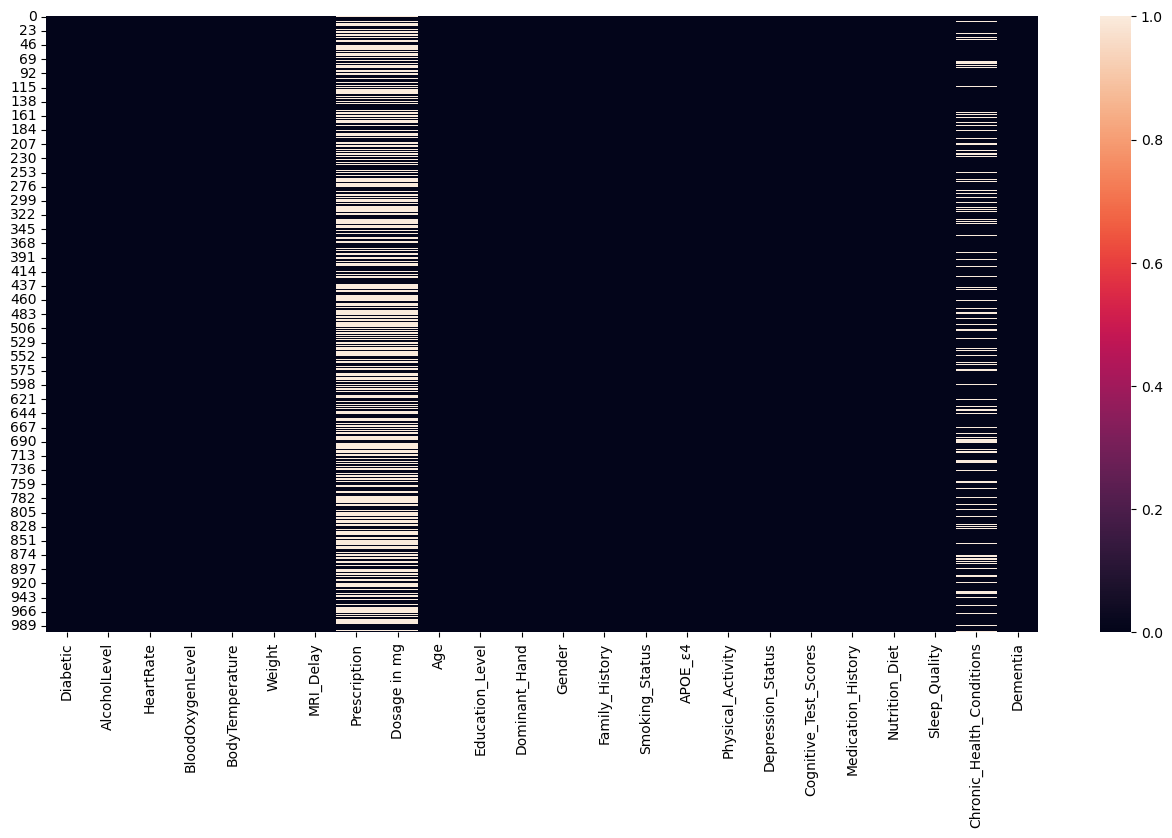

In [27]:
plt.figure(figsize= (16, 8))
sns.heatmap(
    sub_dataset.isnull(), vmin = 0, vmax = 1
)
plt.show()

In [28]:
sub_dataset.loc[sub_dataset.duplicated()] 

Empty DataFrame
Columns: [Diabetic, AlcoholLevel, HeartRate, BloodOxygenLevel, BodyTemperature, Weight, MRI_Delay, Prescription, Dosage in mg, Age, Education_Level, Dominant_Hand, Gender, Family_History, Smoking_Status, APOE_ε4, Physical_Activity, Depression_Status, Cognitive_Test_Scores, Medication_History, Nutrition_Diet, Sleep_Quality, Chronic_Health_Conditions, Dementia]
Index: []

[0 rows x 24 columns]

In [29]:
sub_dataset = sub_dataset.drop(['Prescription', 'Dosage in mg'], axis = 1)

In [33]:
sub_dataset['Chronic_Health_Conditions'].value_counts()

Chronic_Health_Conditions
Diabetes         513
Heart Disease    155
Hypertension     153
Name: count, dtype: int64

In [35]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

In [36]:
categorical_cols = [
    'Education_Level', 'Dominant_Hand', 'Gender', 'Family_History',
    'Smoking_Status', 'APOE_ε4', 'Physical_Activity',
    'Depression_Status', 'Nutrition_Diet', 'Sleep_Quality',
    'Medication_History'
]

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    sub_dataset[col] = le.fit_transform(sub_dataset[col].astype(str))
    label_encoders[col] = le

target_le = LabelEncoder()
non_null_mask = sub_dataset['Chronic_Health_Conditions'].notnull()
sub_dataset.loc[non_null_mask, 'Chronic_Health_Conditions_encoded'] = target_le.fit_transform(
    sub_dataset.loc[non_null_mask, 'Chronic_Health_Conditions']
)

sub_dataset = sub_dataset.drop(columns=['Chronic_Health_Conditions'])

imputer = KNNImputer(n_neighbors=5)
imputed_array = imputer.fit_transform(sub_dataset)

encoded_col_index = sub_dataset.columns.get_loc('Chronic_Health_Conditions_encoded')
imputed_labels = np.round(imputed_array[:, encoded_col_index]).astype(int)

sub_dataset['Chronic_Health_Conditions'] = target_le.inverse_transform(imputed_labels)
for col, le in label_encoders.items():
    sub_dataset[col] = le.inverse_transform(sub_dataset[col])
sub_dataset = sub_dataset.drop(columns='Chronic_Health_Conditions_encoded')

print(sub_dataset['Chronic_Health_Conditions'].value_counts())

Chronic_Health_Conditions
Diabetes         595
Heart Disease    251
Hypertension     154
Name: count, dtype: int64


In [38]:
sub_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diabetic                   1000 non-null   object 
 1   AlcoholLevel               1000 non-null   float64
 2   HeartRate                  1000 non-null   int64  
 3   BloodOxygenLevel           1000 non-null   float64
 4   BodyTemperature            1000 non-null   float64
 5   Weight                     1000 non-null   float64
 6   MRI_Delay                  1000 non-null   float64
 7   Age                        1000 non-null   int64  
 8   Education_Level            1000 non-null   object 
 9   Dominant_Hand              1000 non-null   object 
 10  Gender                     1000 non-null   object 
 11  Family_History             1000 non-null   object 
 12  Smoking_Status             1000 non-null   object 
 13  APOE_ε4                    1000 non-null   object

In [41]:
categorical_features = ['Diabetic', 'Education_Level', 'Dominant_Hand', 'Gender', 
    'Family_History', 'Smoking_Status', 'APOE_ε4', 'Physical_Activity', 'Depression_Status',
    'Medication_History', 'Nutrition_Diet', 'Sleep_Quality', 'Chronic_Health_Conditions']
sub_dataset[categorical_features] = sub_dataset[categorical_features].astype('category')

# **3. Visualization**

In [44]:
import scipy.stats as stats

In [46]:
numerical_features = ['AlcoholLevel', 'HeartRate', 'BloodOxygenLevel', 'BodyTemperature', 'Weight', 'MRI_Delay', 'Age', 'Cognitive_Test_Scores']

In [48]:
def visualize_numeric_distribution(df, numerical_columns, q_min, q_max):
    for col in numerical_columns:
        fig, axs = plt.subplots(2, 2, figsize=(12, 8))
        fig.suptitle(f"Distribution Summary for '{col}'", fontsize=16)
    
        # Histogram + KDE
        sns.histplot(data=df, x=col, kde=True, ax=axs[0, 0], color='skyblue')
        axs[0, 0].set_title('Histogram + KDE')
    
        # QQ Plot
        stats.probplot(x=df[col], dist="norm", plot=axs[0, 1])
        axs[0, 1].set_title('QQ Plot')
    
        # Boxplot
        sns.boxplot(data=df, x=col, ax=axs[1, 0], color='lightgreen')
        axs[1, 0].set_title('Boxplot')
    
        # Quantile Trend (Outlier)
        quantiles = df[col].quantile(np.arange(q_min, q_max, 0.01))
        axs[1, 1].plot(quantiles.index, quantiles.values, marker='o', color='coral')
        axs[1, 1].set_title(f'Quantiles from {q_min} to {q_max}')
        # axs[1, 1].set_xlabel()
        axs[1, 1].set_ylabel(f'{col}')
        axs[1, 1].grid(True)
    
        plt.tight_layout()
        plt.show()

In [50]:
def visualize_all_categorical(df, categorical_columns):
    if 'Dementia' not in categorical_columns:
        categorical_columns.append('Dementia')
    for col in categorical_columns:
        count_data = df[col].value_counts().sort_index()

        fig, axs = plt.subplots(1, 2, figsize=(12, 4))
        fig.suptitle(f'Distribution of: {col}', fontsize=15)

        # Countplot
        sns.countplot(data=df, y=col, hue=col, order=count_data.index, ax=axs[0])
        axs[0].set_title('Counts')

        # Pie Chart
        axs[1].pie(count_data, labels=count_data.index, autopct='%1.1f%%', startangle=90)
        axs[1].set_title('Proportions')

        plt.tight_layout()
        plt.show()

## 3.1. Numerical

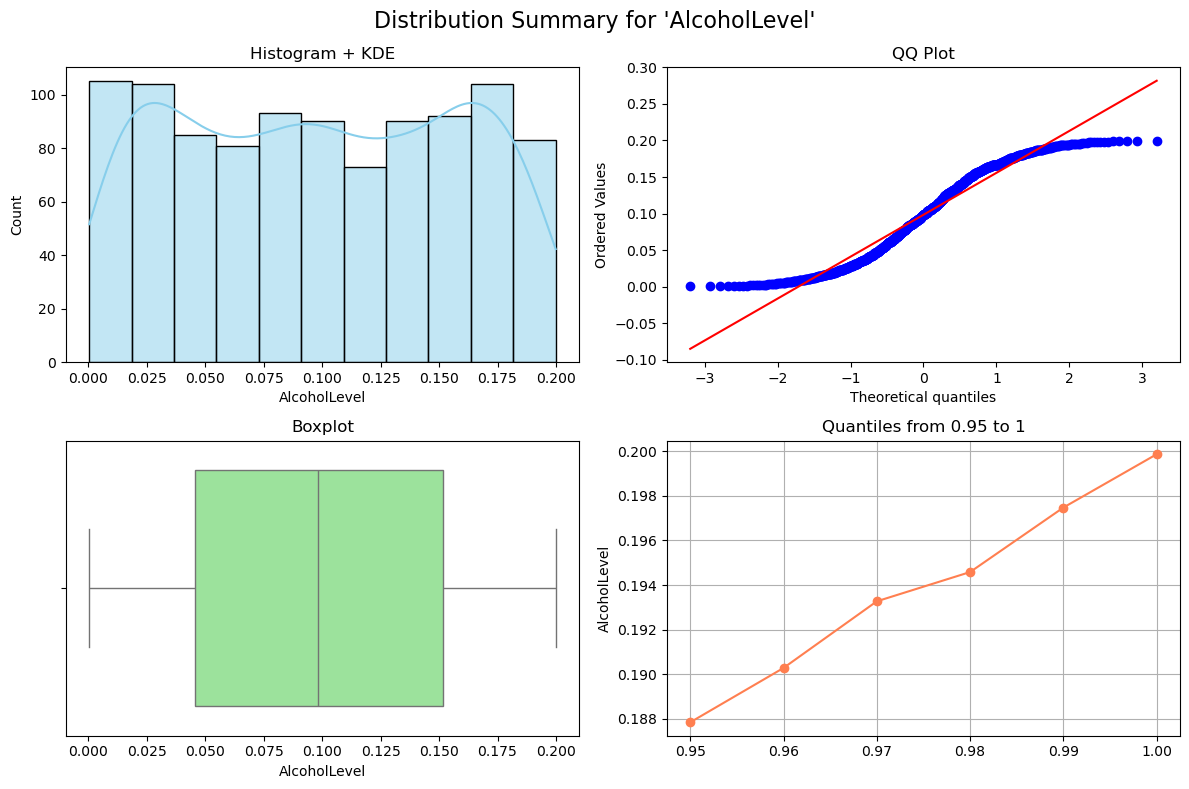

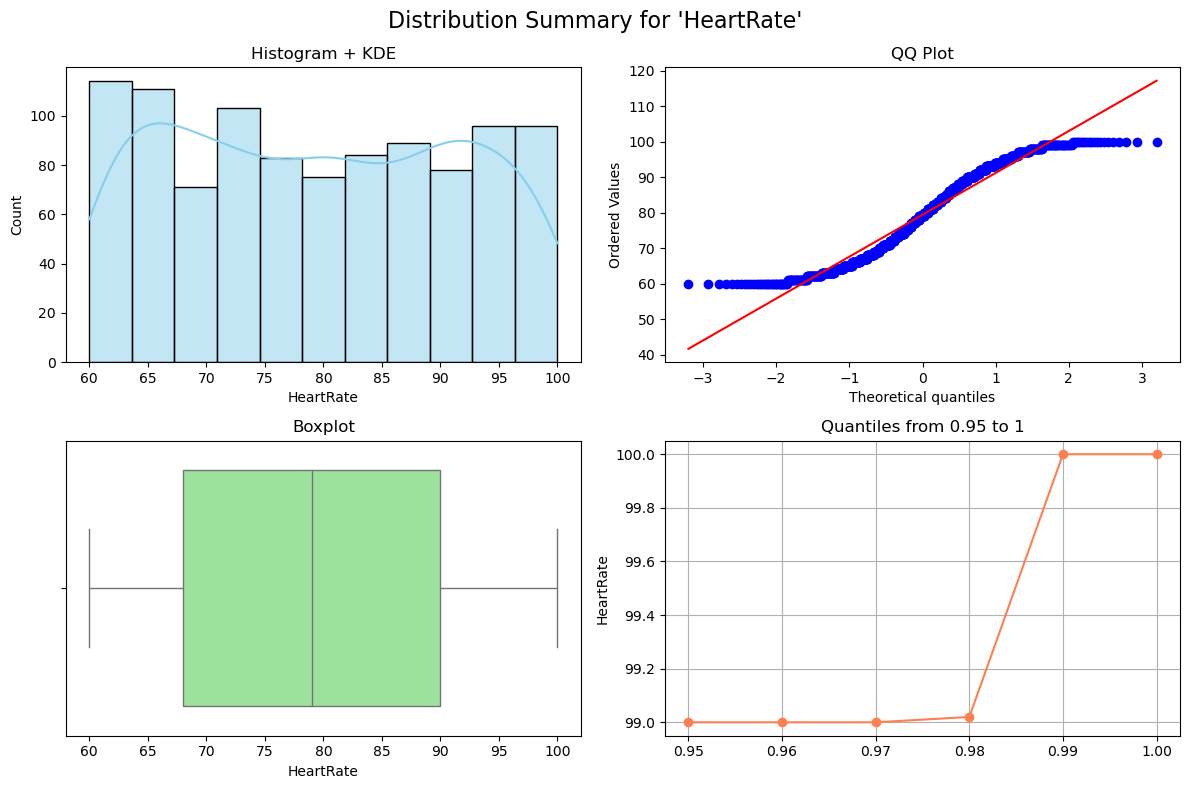

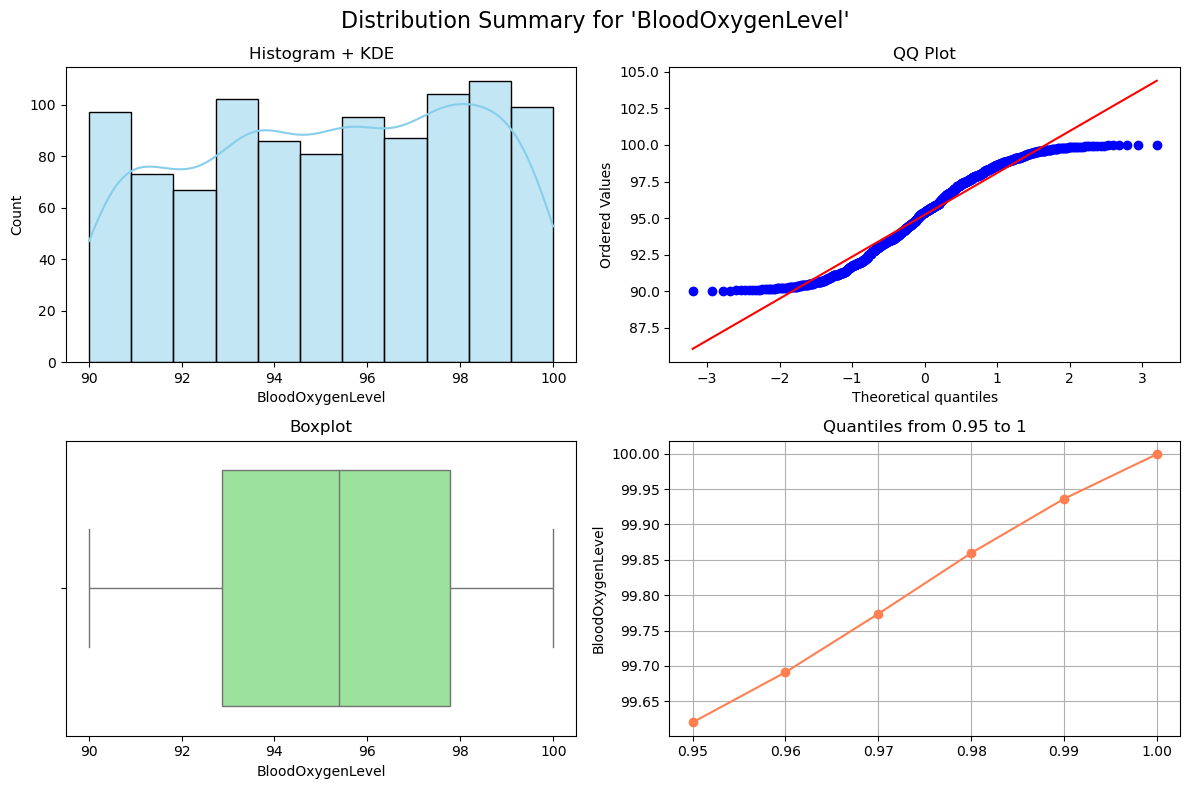

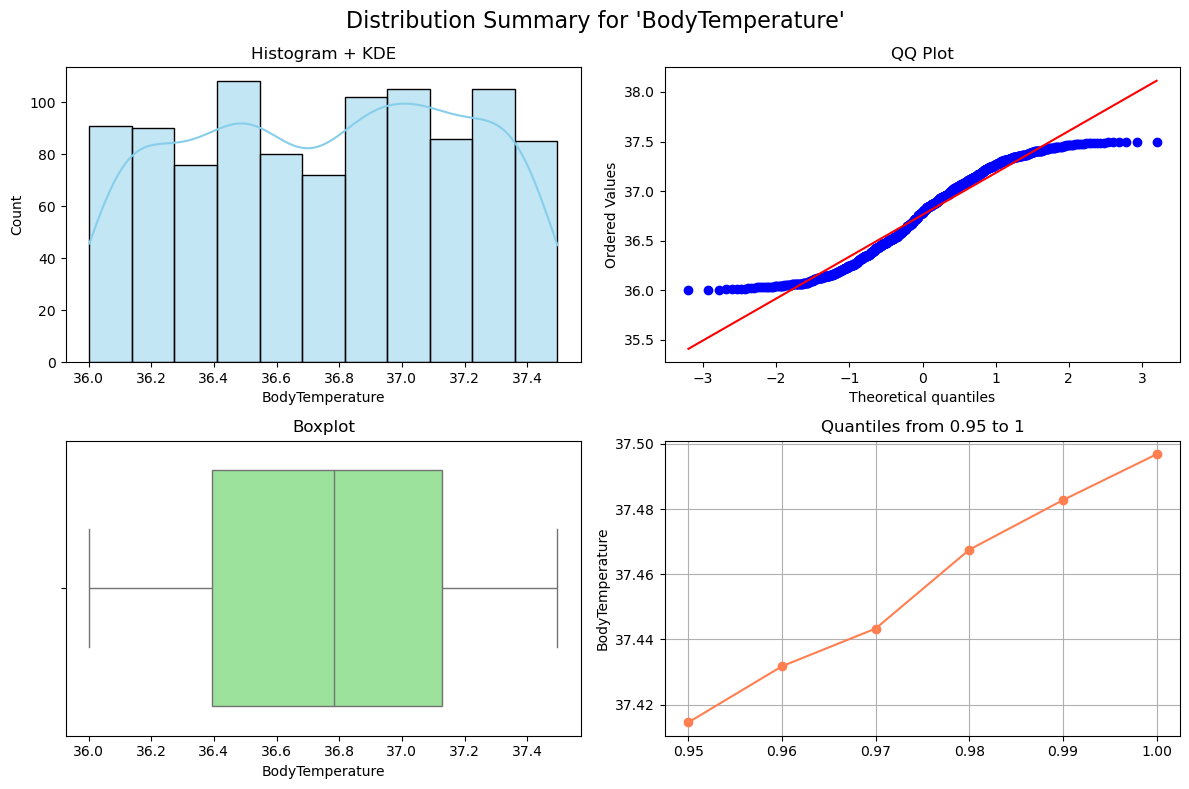

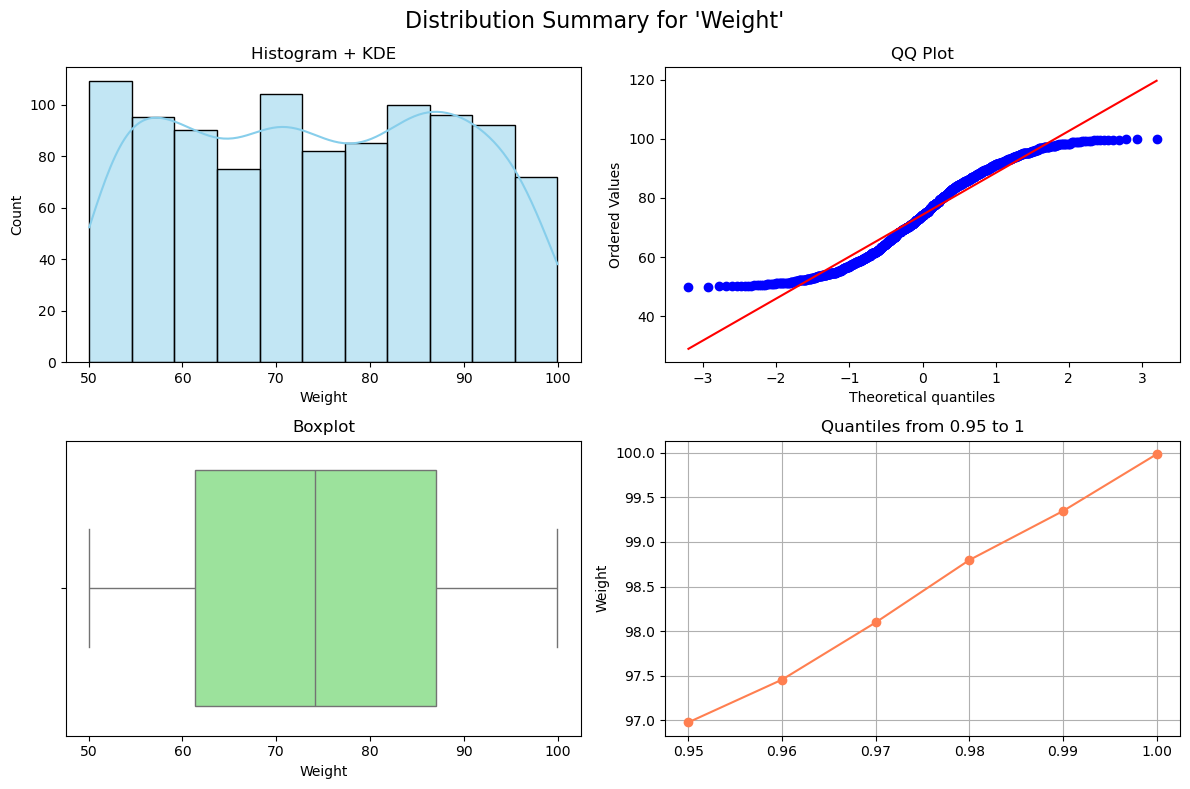

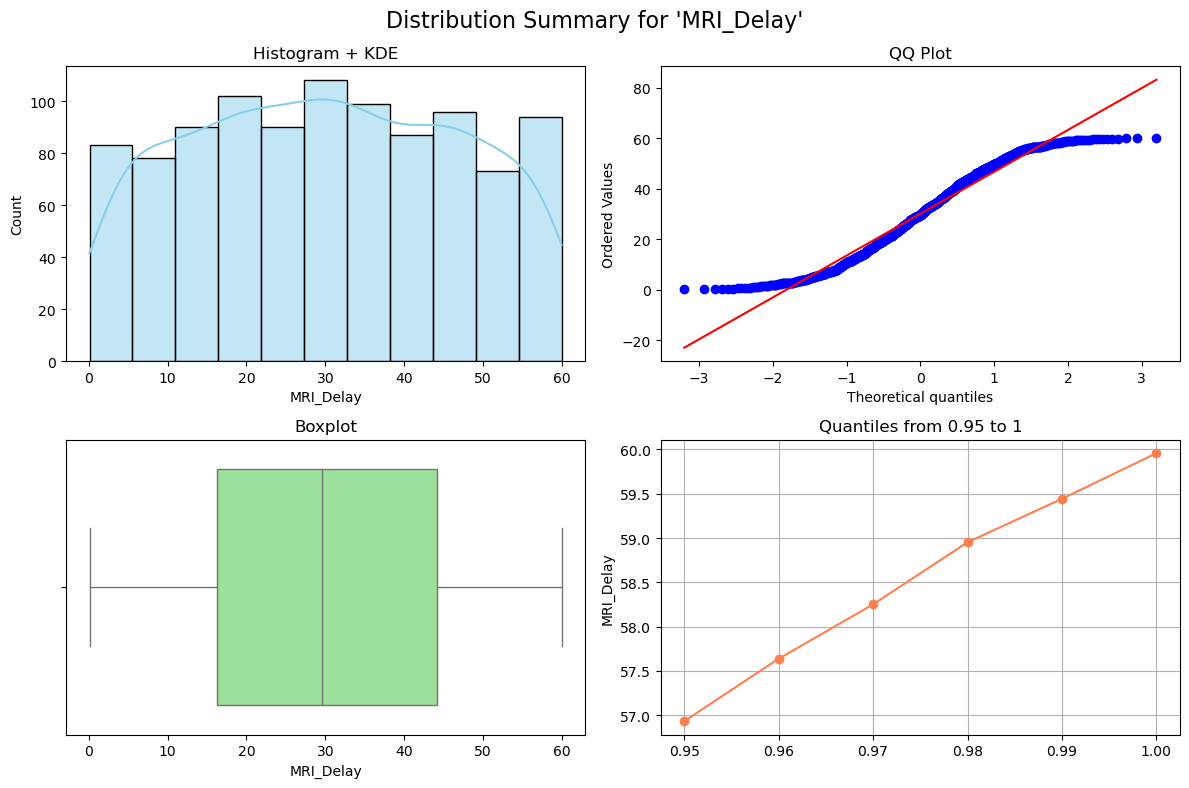

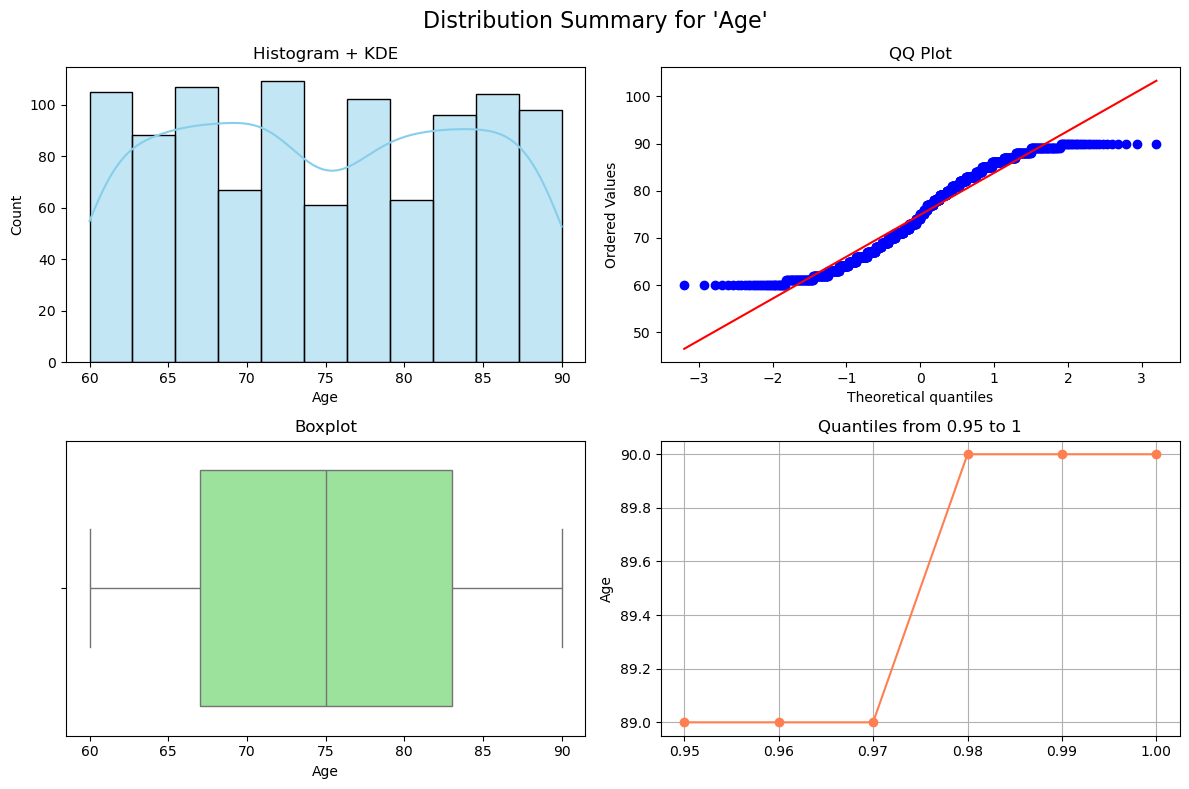

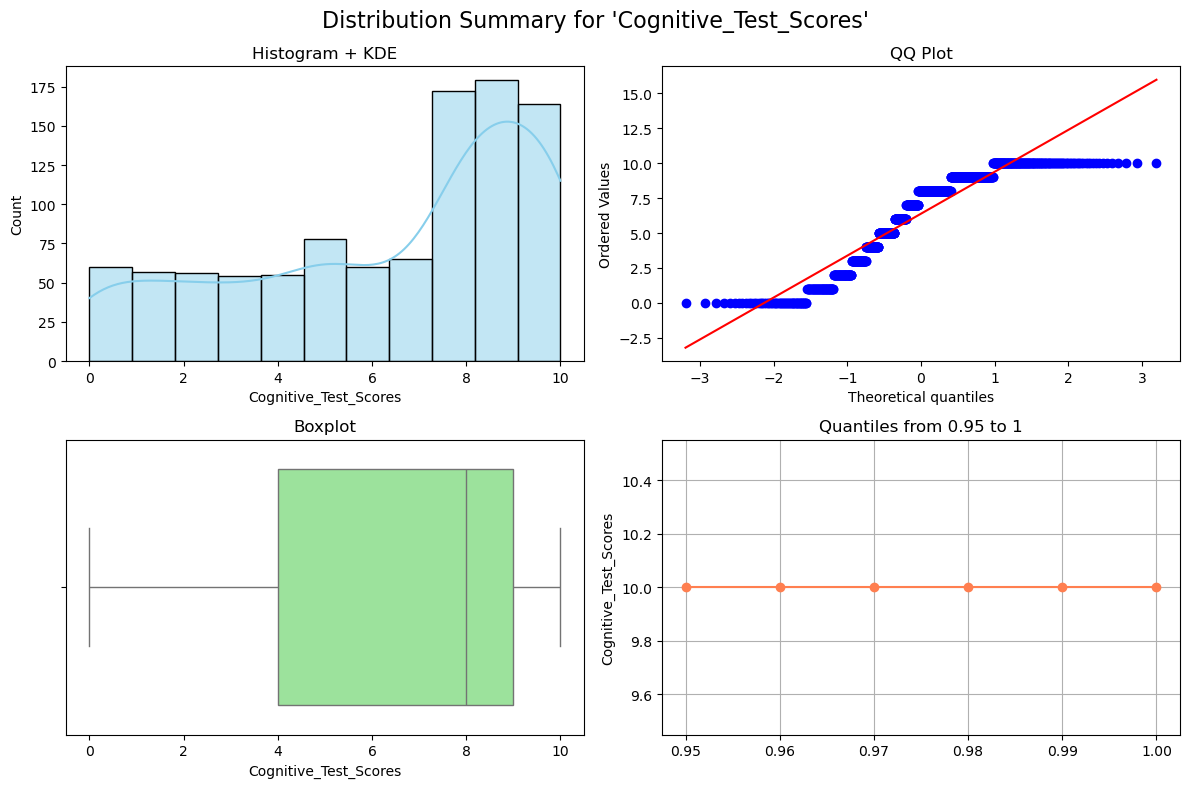

In [53]:
visualize_numeric_distribution(sub_dataset, numerical_features, 0.95, 1)

## 3.2. Categorical

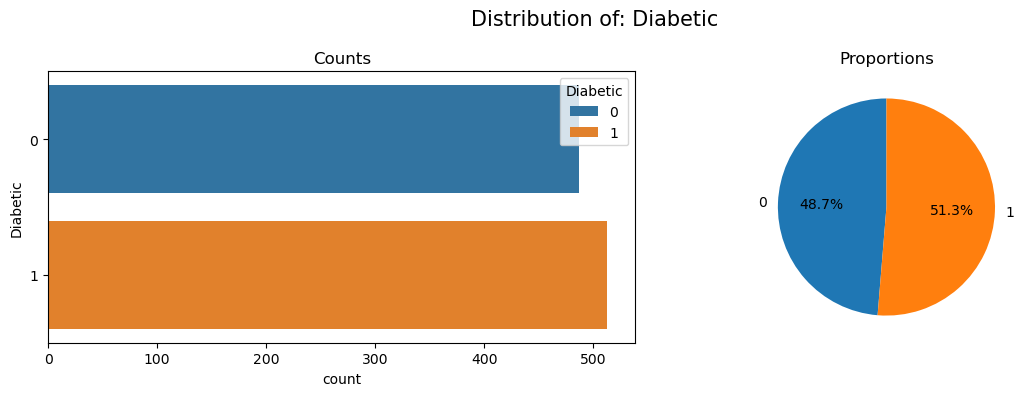

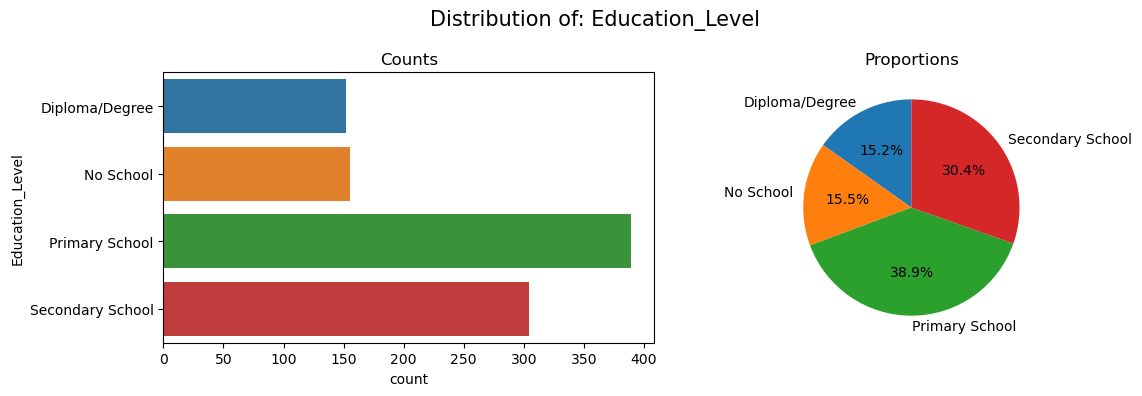

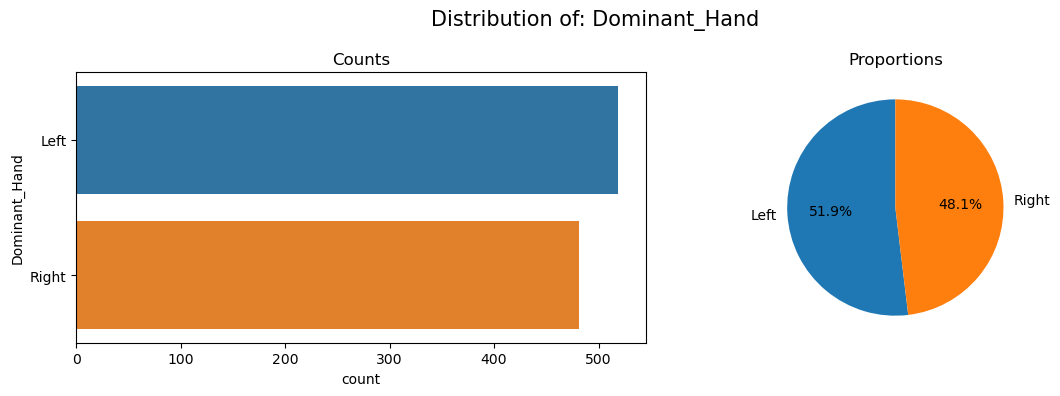

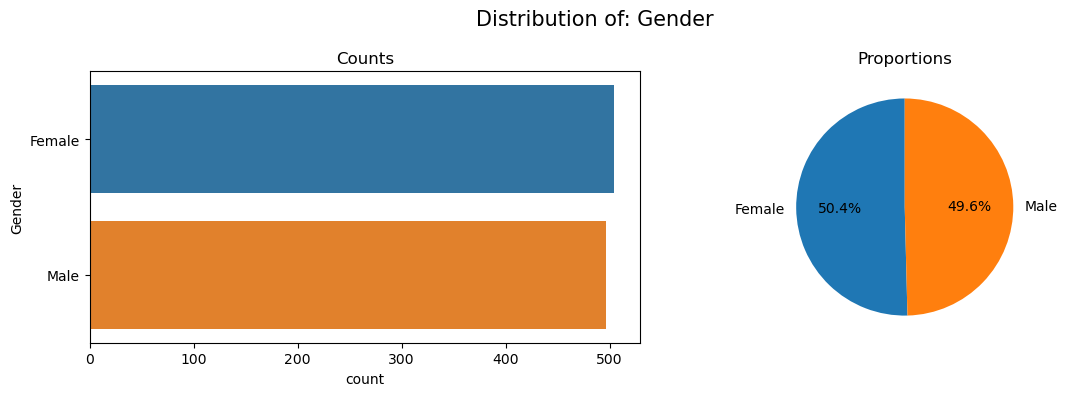

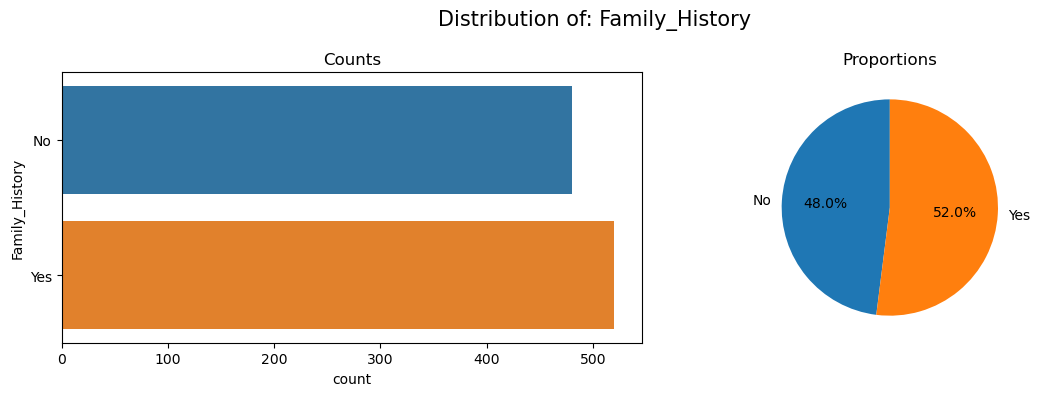

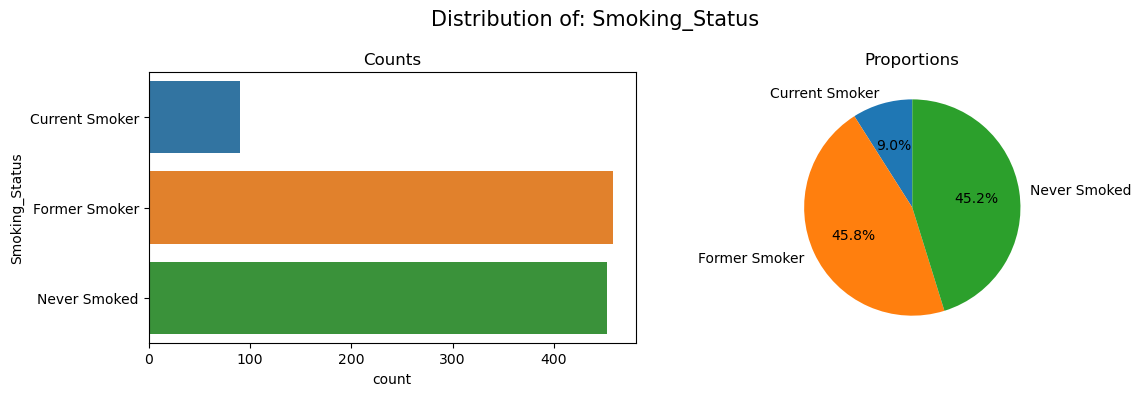

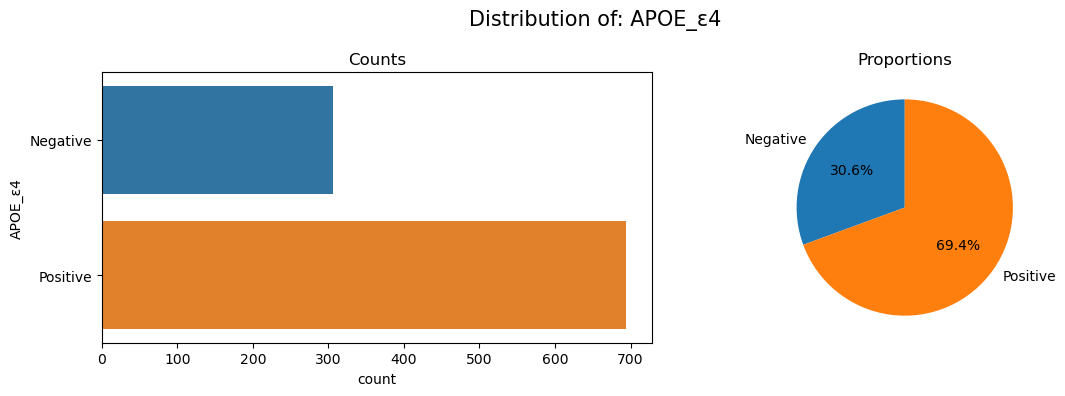

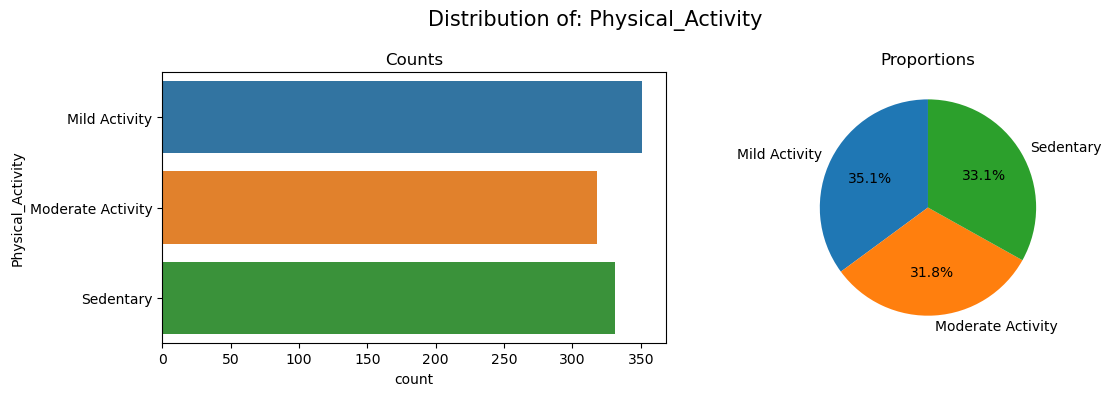

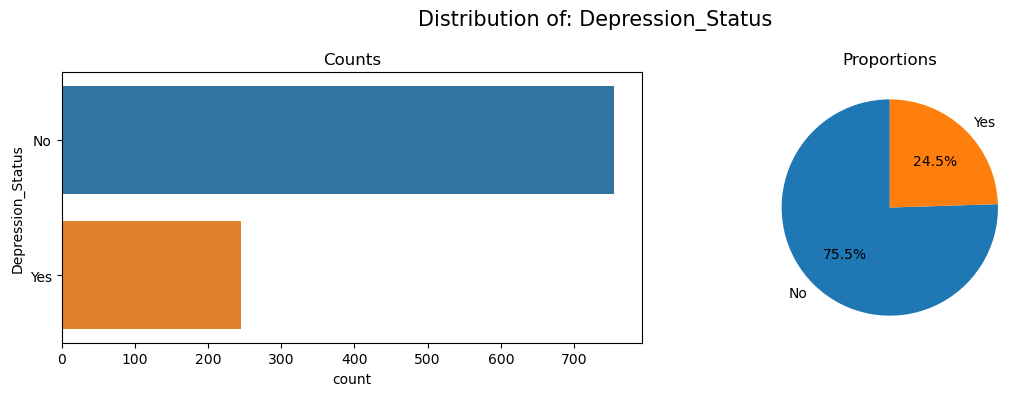

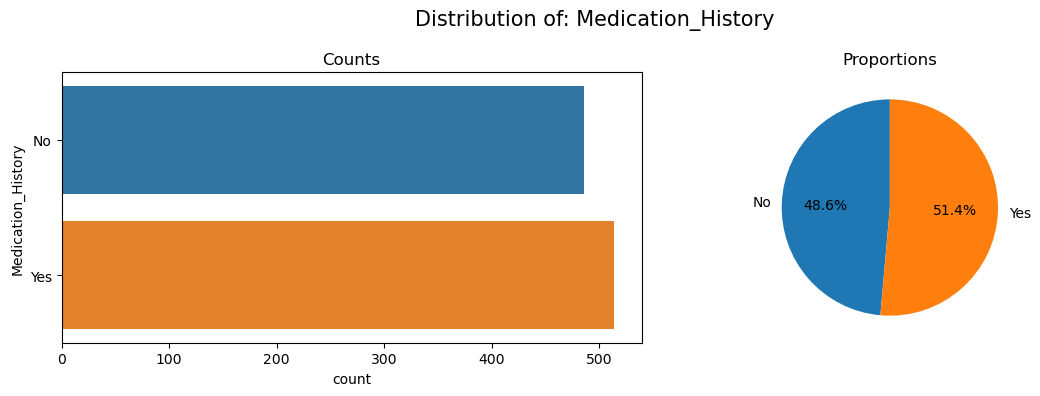

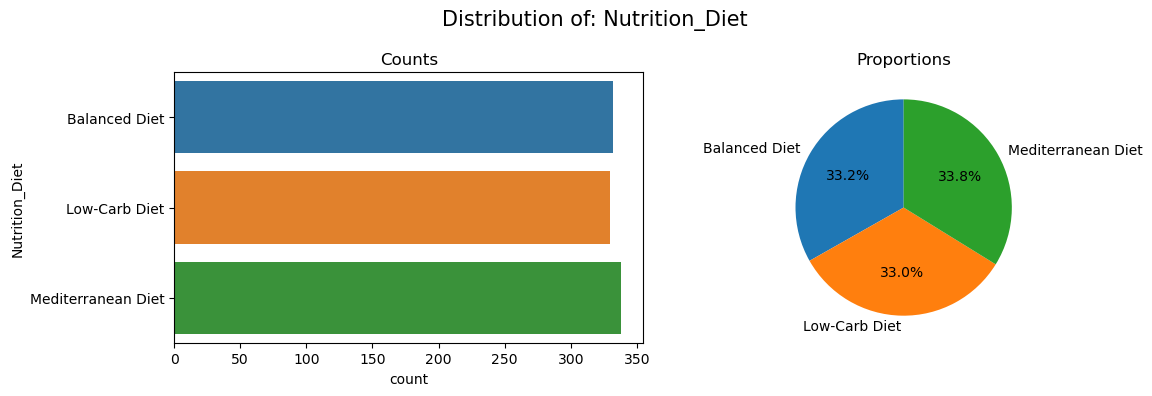

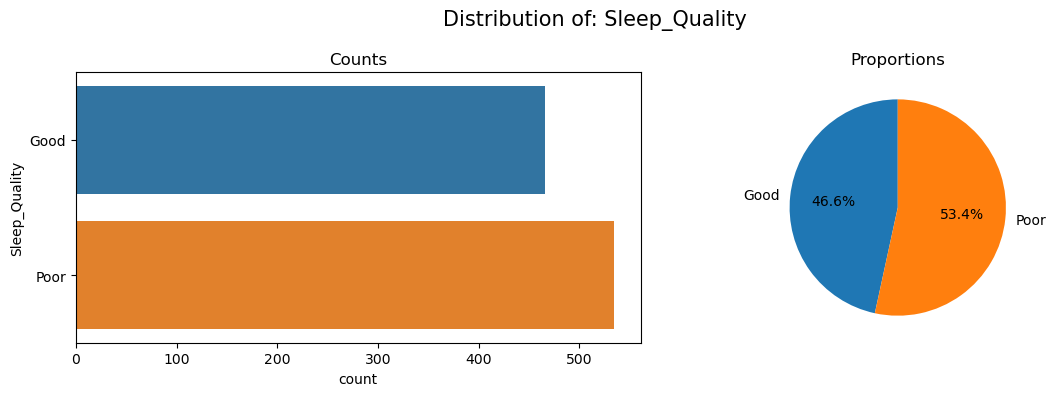

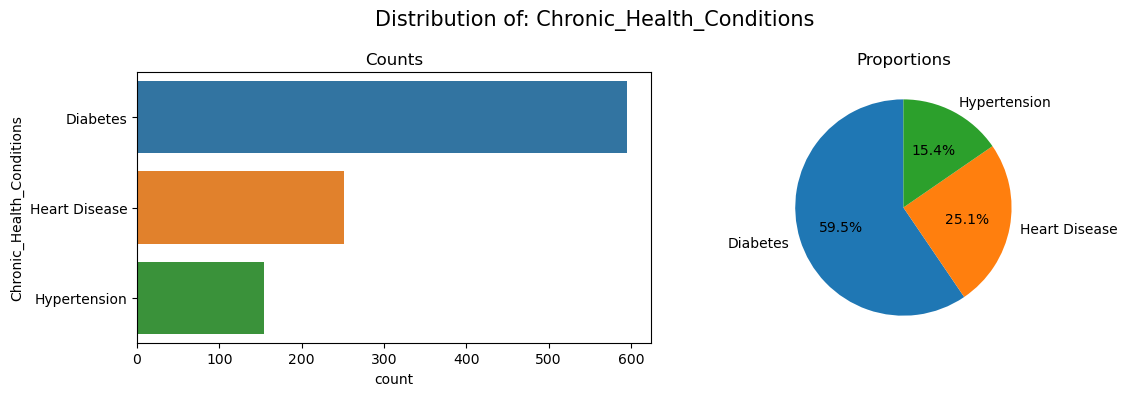

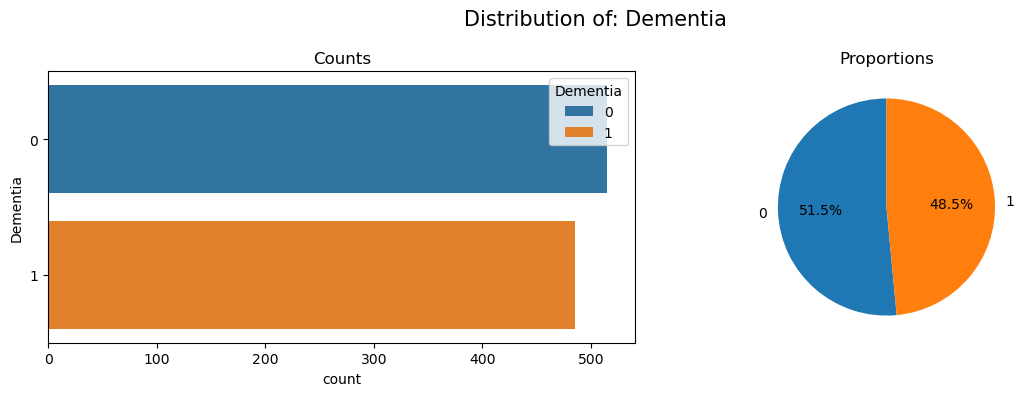

In [55]:
visualize_all_categorical(sub_dataset, categorical_features)

# **4. Relationship Analysis**

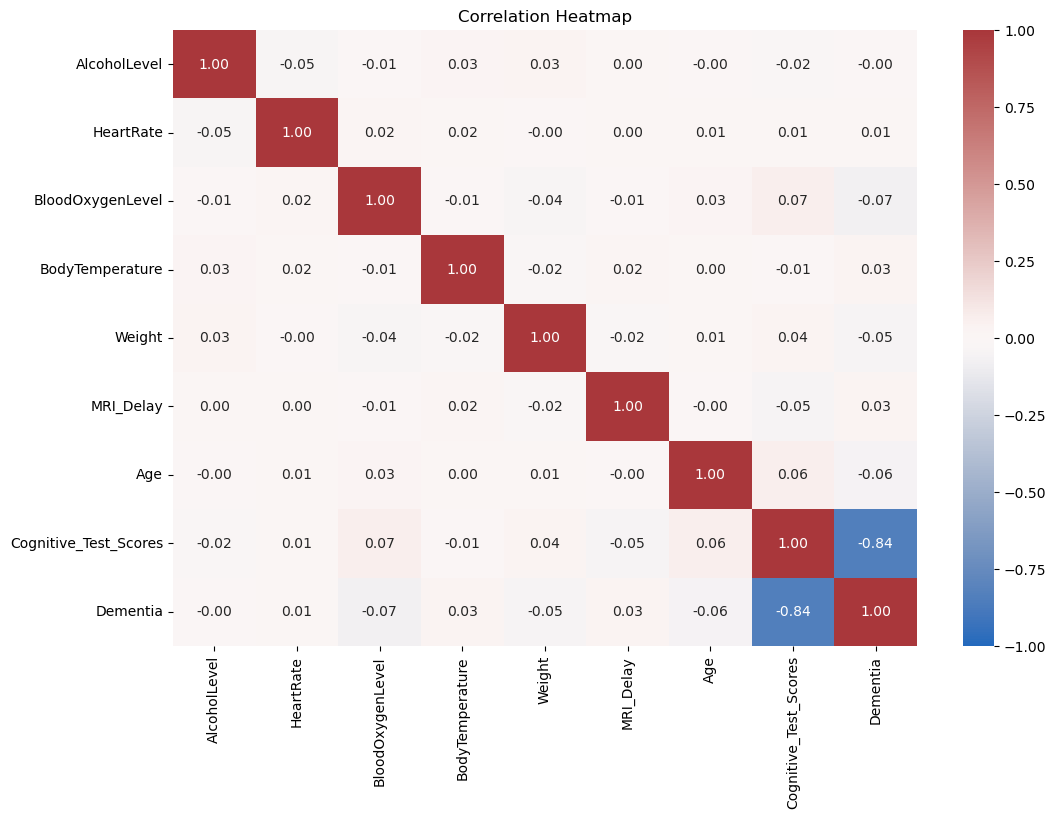

In [57]:
plt.figure(figsize = (12, 8), facecolor = "white")

sns.heatmap(
    data = sub_dataset.corr(numeric_only = True),
    cmap = "vlag",
    vmin = -1, vmax = 1,
    linecolor = "white", 
    annot = True,
    fmt = ".2f"
)

plt.title('Correlation Heatmap')
plt.show()

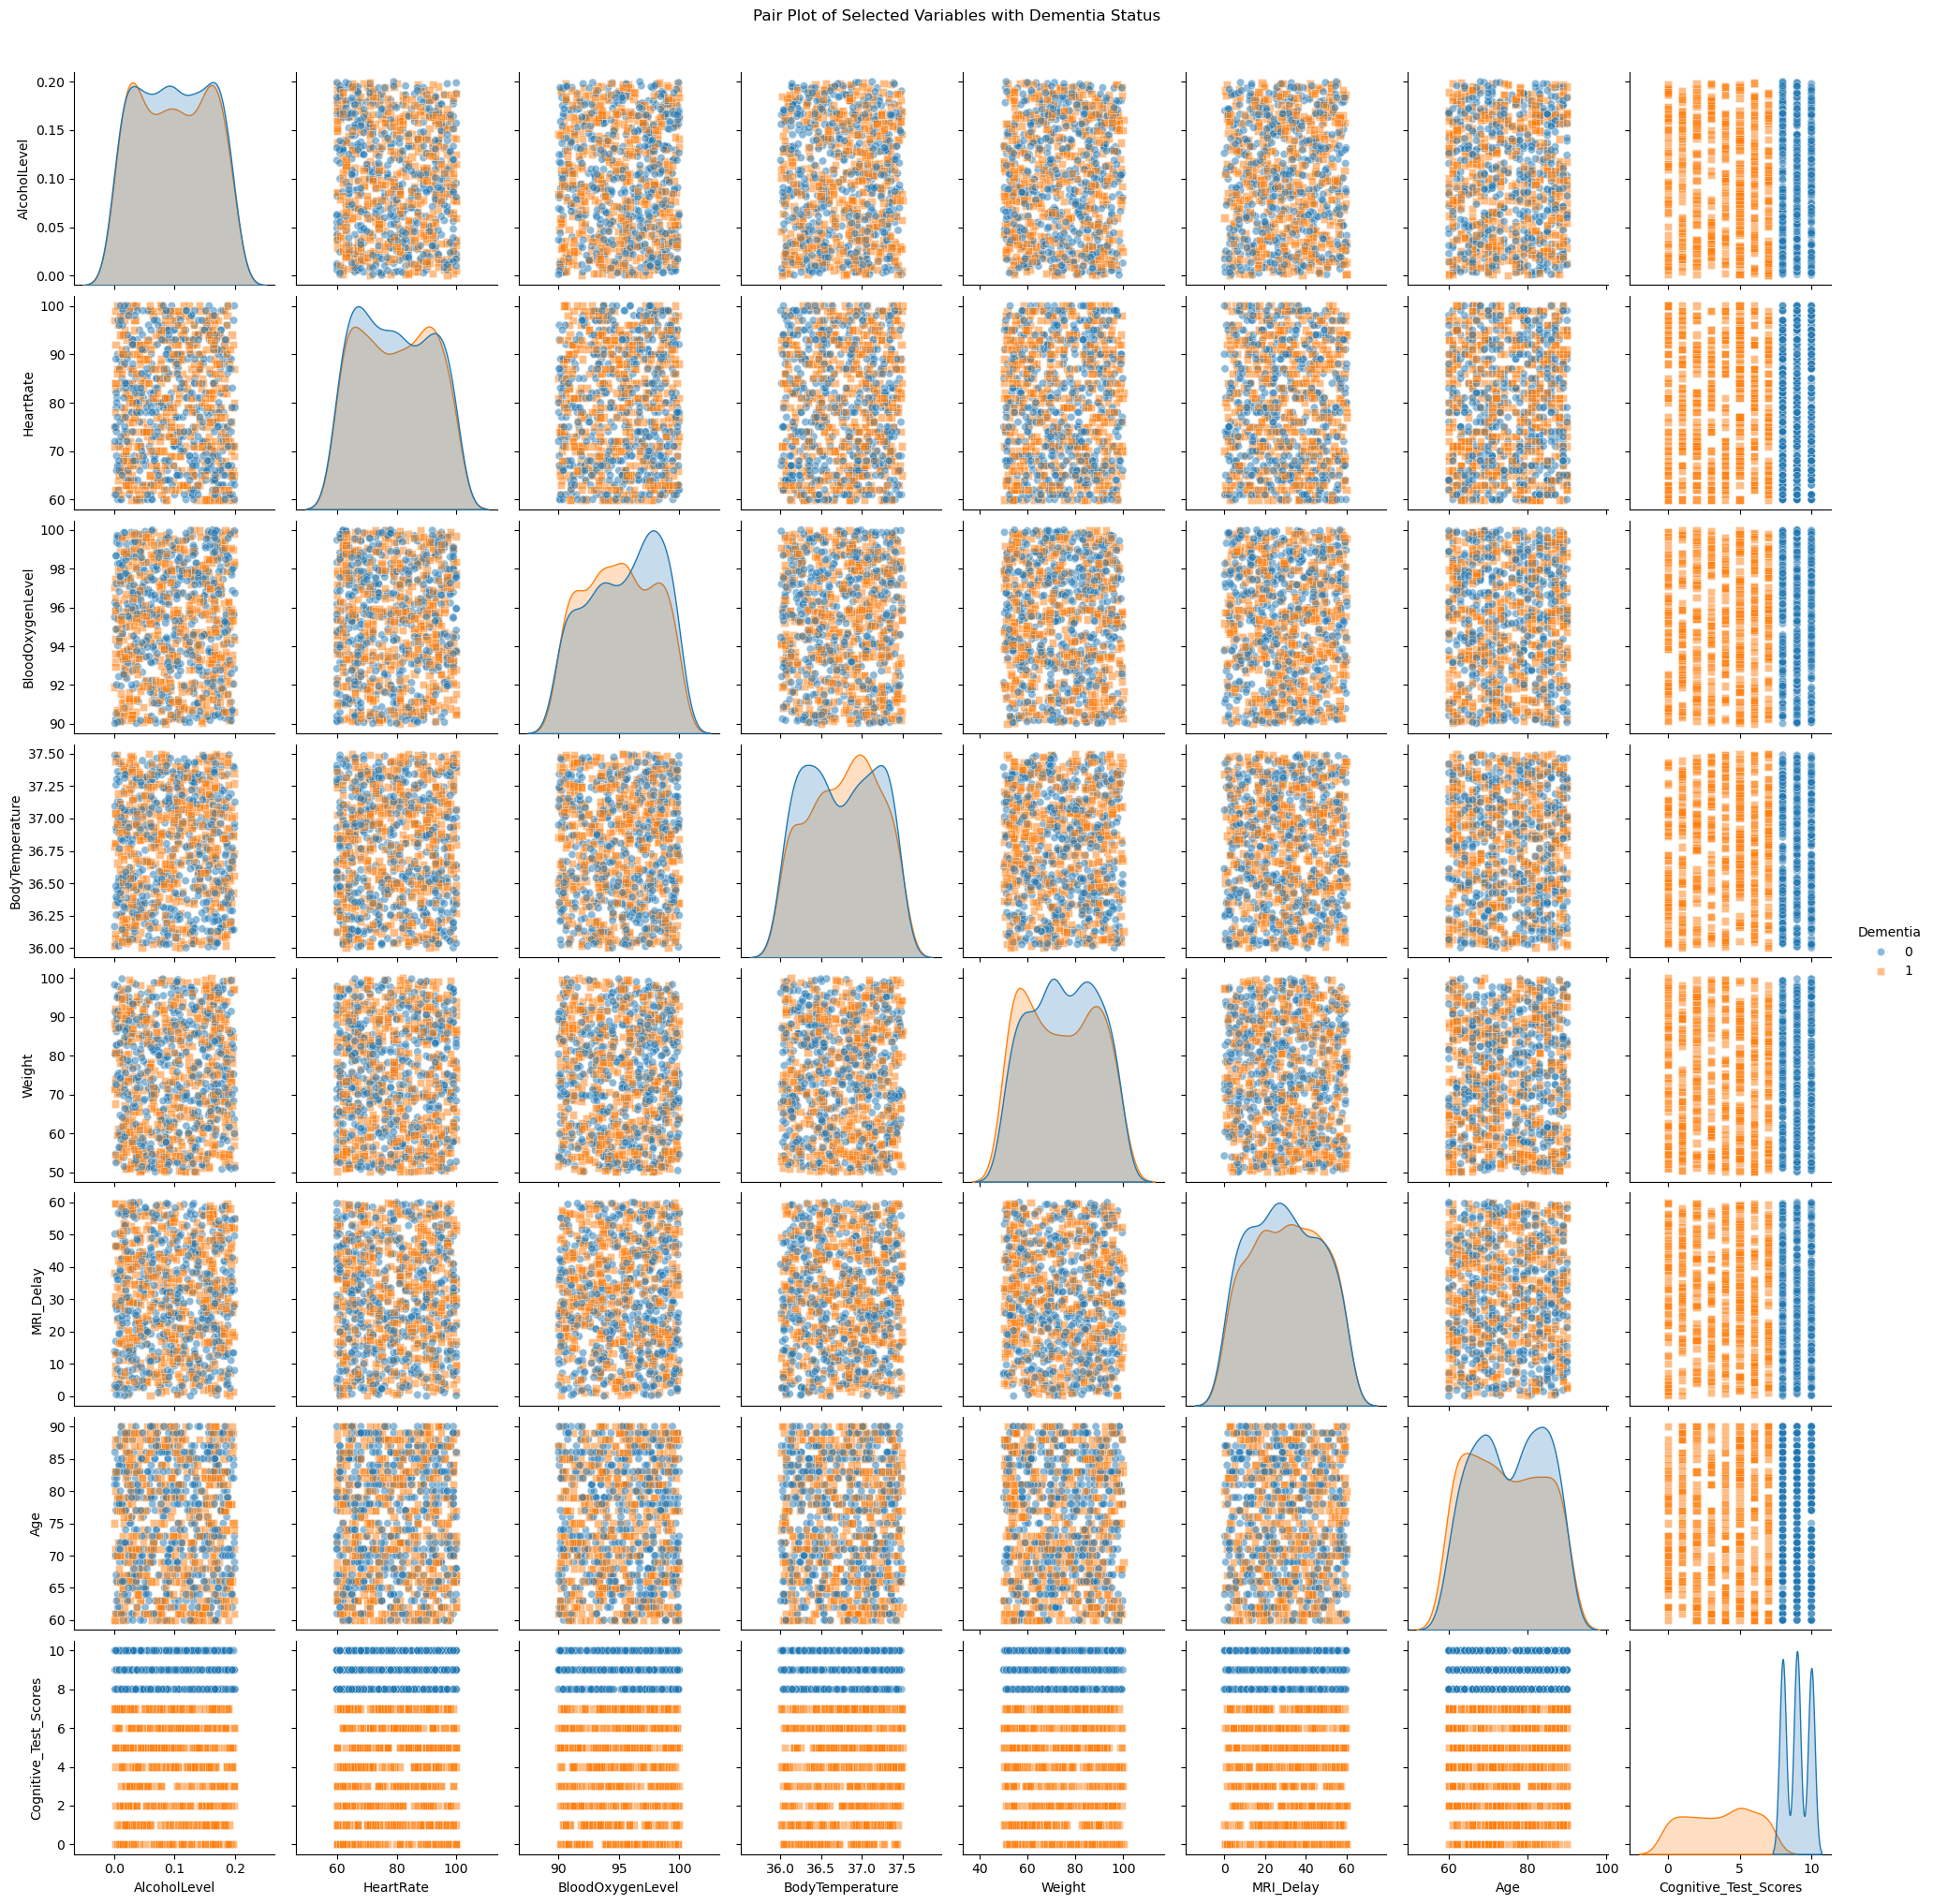

In [58]:
selected_variables_for_pair_plot = [
    'AlcoholLevel', 'HeartRate', 'BloodOxygenLevel', 'BodyTemperature', 'Weight', 
        'MRI_Delay', 'Age', 'Cognitive_Test_Scores', 'Dementia'
]

sns.pairplot(sub_dataset[selected_variables_for_pair_plot], hue='Dementia', diag_kind='kde', markers=["o", "s"], plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Selected Variables with Dementia Status', y=1.02)
plt.show()

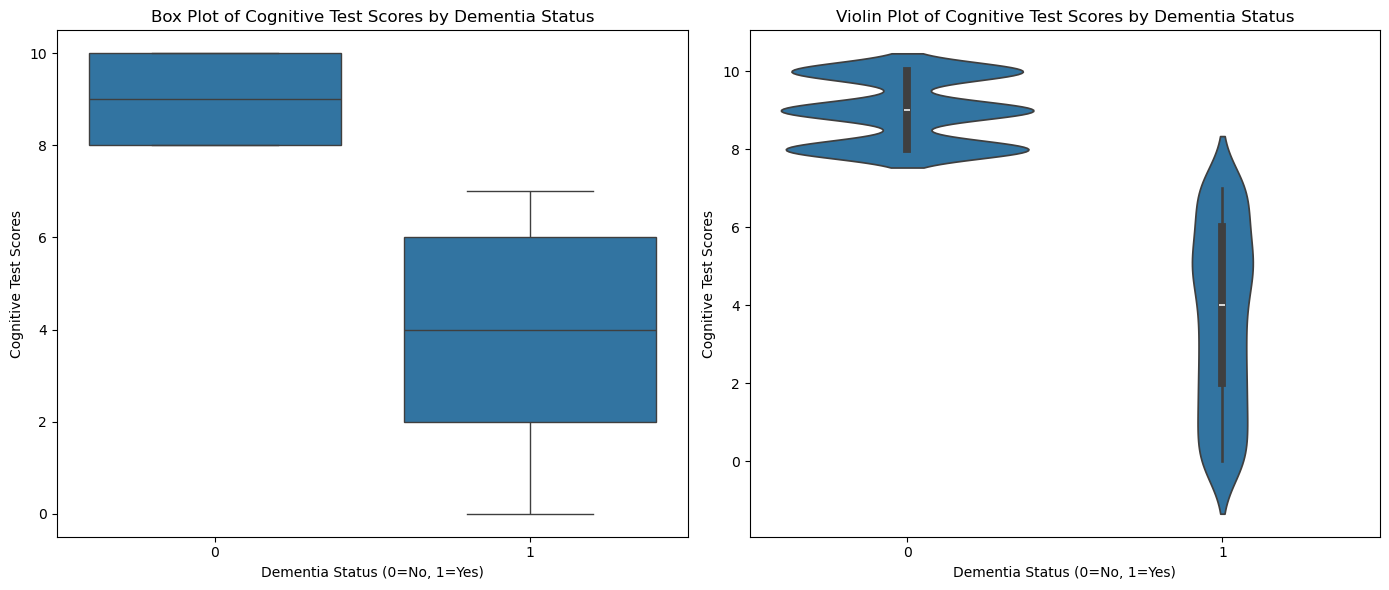

In [60]:
plt.figure(figsize=(14, 6))

# Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(x='Dementia', y='Cognitive_Test_Scores', data=sub_dataset)
plt.title('Box Plot of Cognitive Test Scores by Dementia Status')
plt.xlabel('Dementia Status (0=No, 1=Yes)')
plt.ylabel('Cognitive Test Scores')

# Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(x='Dementia', y='Cognitive_Test_Scores', data=sub_dataset)
plt.title('Violin Plot of Cognitive Test Scores by Dementia Status')
plt.xlabel('Dementia Status (0=No, 1=Yes)')
plt.ylabel('Cognitive Test Scores')

plt.tight_layout()
plt.show()

In [61]:
sub_dataset = sub_dataset.drop(['Cognitive_Test_Scores'], axis = 1)

## 4.1. Relationship between categorical features

In [68]:
from scipy.stats import chi2_contingency

In [70]:
def chi2_categorical_analysis(df, cat_cols, target_col):
    
    results = {}

    for col in cat_cols:
        if col=='Dementia':
            continue
            
        print(f"\n Chi2 test for: '{col}' vs '{target_col}'")
        cross_tab = pd.crosstab(df[col], df[target_col])
        
        if cross_tab.shape[1] != 2:
            print(f"'{col}' there is no exactly two values for '{target_col}'")
            continue

        chi2, p, dof, ex = chi2_contingency(cross_tab)
        print(f"  p-value = {p}")

        cross_tab['ratio(1/total)'] = cross_tab[1] / (cross_tab[0] + cross_tab[1])
        display(cross_tab)

        results[col] = {
            'p_value': p,
            'table': cross_tab
        }
    
    return results

In [72]:
chi2_results = chi2_categorical_analysis(sub_dataset, categorical_features, 'Dementia')


 Chi2 test for: 'Diabetic' vs 'Dementia'
  p-value = 0.17577171167745576


Dementia    0    1  ratio(1/total)
Diabetic                          
0         262  225        0.462012
1         253  260        0.506823


 Chi2 test for: 'Education_Level' vs 'Dementia'
  p-value = 2.978218555755508e-06


Dementia            0    1  ratio(1/total)
Education_Level                           
Diploma/Degree    101   51        0.335526
No School          57   98        0.632258
Primary School    208  181        0.465296
Secondary School  149  155        0.509868


 Chi2 test for: 'Dominant_Hand' vs 'Dementia'
  p-value = 0.978278282391843


Dementia         0    1  ratio(1/total)
Dominant_Hand                          
Left           268  251        0.483622
Right          247  234        0.486486


 Chi2 test for: 'Gender' vs 'Dementia'
  p-value = 1.0


Dementia    0    1  ratio(1/total)
Gender                            
Female    260  244        0.484127
Male      255  241        0.485887


 Chi2 test for: 'Family_History' vs 'Dementia'
  p-value = 0.00599065320507048


Dementia          0    1  ratio(1/total)
Family_History                          
No              225  255        0.531250
Yes             290  230        0.442308


 Chi2 test for: 'Smoking_Status' vs 'Dementia'
  p-value = 3.438453432824807e-21


Dementia          0    1  ratio(1/total)
Smoking_Status                          
Current Smoker   90    0        0.000000
Former Smoker   206  252        0.550218
Never Smoked    219  233        0.515487


 Chi2 test for: 'APOE_ε4' vs 'Dementia'
  p-value = 3.361860536197276e-41


Dementia    0    1  ratio(1/total)
APOE_ε4                           
Negative  256   50        0.163399
Positive  259  435        0.626801


 Chi2 test for: 'Physical_Activity' vs 'Dementia'
  p-value = 0.8719418594188298


Dementia             0    1  ratio(1/total)
Physical_Activity                          
Mild Activity      182  169        0.481481
Moderate Activity  160  158        0.496855
Sedentary          173  158        0.477341


 Chi2 test for: 'Depression_Status' vs 'Dementia'
  p-value = 2.5231461865260466e-76


Dementia             0    1  ratio(1/total)
Depression_Status                          
No                 515  240        0.317881
Yes                  0  245        1.000000


 Chi2 test for: 'Medication_History' vs 'Dementia'
  p-value = 0.8782537905620287


Dementia              0    1  ratio(1/total)
Medication_History                          
No                  252  234        0.481481
Yes                 263  251        0.488327


 Chi2 test for: 'Nutrition_Diet' vs 'Dementia'
  p-value = 0.6234787909613961


Dementia              0    1  ratio(1/total)
Nutrition_Diet                              
Balanced Diet       178  154        0.463855
Low-Carb Diet       168  162        0.490909
Mediterranean Diet  169  169        0.500000


 Chi2 test for: 'Sleep_Quality' vs 'Dementia'
  p-value = 0.5672841025931478


Dementia         0    1  ratio(1/total)
Sleep_Quality                          
Good           245  221        0.474249
Poor           270  264        0.494382


 Chi2 test for: 'Chronic_Health_Conditions' vs 'Dementia'
  p-value = 0.25429115773340777


Dementia                     0    1  ratio(1/total)
Chronic_Health_Conditions                          
Diabetes                   294  301        0.505882
Heart Disease              139  112        0.446215
Hypertension                82   72        0.467532

In [74]:
sub_dataset = sub_dataset.drop(['Dominant_Hand', 'Gender'], axis = 1)

# **5. Model training and comparison**

# 5.1. Preparing

In [78]:
columns_for_encoding = ["Diabetic", "Education_Level", "Family_History", "Smoking_Status", "APOE_ε4", "Physical_Activity",
                        "Depression_Status", "Medication_History", "Nutrition_Diet", "Sleep_Quality", "Chronic_Health_Conditions"]

In [80]:
from sklearn.preprocessing import OneHotEncoder

In [82]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_array = encoder.fit_transform(sub_dataset[columns_for_encoding])

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(columns_for_encoding))

encoded_df.reset_index(drop=True, inplace=True)
sub_dataset.reset_index(drop=True, inplace=True)

sub_dataset_dropped = sub_dataset.drop(columns=columns_for_encoding)

df_encoded = pd.concat([sub_dataset_dropped, encoded_df], axis=1)

df_encoded.head()

AlcoholLevel  HeartRate  BloodOxygenLevel  BodyTemperature     Weight  \
0      0.084974         98         96.230743        36.224852  57.563978   
1      0.016973         78         93.032122        36.183874  56.832335   
2      0.009000         89         93.566504        37.326321  59.759066   
3      0.086437         60         93.906510        37.030620  58.266471   
4      0.150747         67         97.508994        36.062121  67.705027   

   MRI_Delay  Age  Dementia  Diabetic_1  Education_Level_No School  ...  \
0  36.421028   60         0         1.0                        0.0  ...   
1  31.157633   61         1         0.0                        0.0  ...   
2  37.640435   69         0         0.0                        0.0  ...   
3  50.673992   78         1         0.0                        0.0  ...   
4  27.810601   77         1         1.0                        0.0  ...   

   APOE_ε4_Positive  Physical_Activity_Moderate Activity  \
0               0.0                                  0.0   
1               1.0                                  1.0   
2               0.0                                  1.0   
3               0.0                                  0.0   
4               1.0                                  0.0   

   Physical_Activity_Sedentary  Depression_Status_Yes  Medication_History_Yes  \
0                          1.0                    0.0                     0.0   
1                          0.0                    0.0                     1.0   
2                          0.0                    0.0                     0.0   
3                          0.0                    1.0                     1.0   
4                          0.0                    0.0                     1.0   

   Nutrition_Diet_Low-Carb Diet  Nutrition_Diet_Mediterranean Diet  \
0                           1.0                                0.0   
1                           1.0                                0.0   
2                           0.0                                1.0   
3                           0.0                                0.0   
4                           1.0                                0.0   

   Sleep_Quality_Poor  Chronic_Health_Conditions_Heart Disease  \
0                 1.0                                      0.0   
1                 1.0                                      1.0   
2                 1.0                                      1.0   
3                 1.0                                      0.0   
4                 0.0                                      0.0   

   Chronic_Health_Conditions_Hypertension  
0                                     0.0  
1                                     0.0  
2                                     0.0  
3                                     1.0  
4                                     0.0  

[5 rows x 25 columns]

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [86]:
features_for_encoding = ['AlcoholLevel', 'HeartRate', 'BloodOxygenLevel', 'BodyTemperature', 'Weight', 'MRI_Delay', 'Age']
df_encoded[features_for_encoding] = scaler.fit_transform(df_encoded[features_for_encoding])

In [88]:
df_encoded.head(10)

AlcoholLevel  HeartRate  BloodOxygenLevel  BodyTemperature    Weight  \
0     -0.229285   1.538404          0.343156        -1.243754 -1.159154   
1     -1.388015  -0.114283         -0.749344        -1.338723 -1.209764   
2     -1.523866   0.794695         -0.566824         1.308986 -1.007314   
3     -0.204344  -1.601702         -0.450694         0.623677 -1.110561   
4      0.891495  -1.023262          0.779747        -1.620896 -0.457668   
5      0.265797   1.207867         -0.232016        -0.193382 -0.534637   
6     -1.401289   0.877329          0.408946         0.609795  0.667880   
7      1.068893   1.538404         -1.099352        -1.648304 -0.322883   
8     -1.408778  -0.857993          1.582568         0.449021 -1.424702   
9     -0.018570  -1.271165         -1.675998        -0.846441 -1.103628   

   MRI_Delay       Age  Dementia  Diabetic_1  Education_Level_No School  ...  \
0   0.374840 -1.639950         0         1.0                        0.0  ...   
1   0.062542 -1.529946         1         0.0                        0.0  ...   
2   0.447193 -0.649908         0         0.0                        0.0  ...   
3   1.220526  0.340135         1         0.0                        0.0  ...   
4  -0.136051  0.230130         1         1.0                        0.0  ...   
5  -0.530963 -0.869917         1         1.0                        1.0  ...   
6  -1.112688  1.330177         1         1.0                        0.0  ...   
7   0.013994 -0.979922         0         0.0                        0.0  ...   
8   0.387221 -0.979922         0         0.0                        0.0  ...   
9   1.131630  1.330177         1         1.0                        0.0  ...   

   APOE_ε4_Positive  Physical_Activity_Moderate Activity  \
0               0.0                                  0.0   
1               1.0                                  1.0   
2               0.0                                  1.0   
3               0.0                                  0.0   
4               1.0                                  0.0   
5               1.0                                  0.0   
6               1.0                                  0.0   
7               0.0                                  0.0   
8               1.0                                  0.0   
9               1.0                                  0.0   

   Physical_Activity_Sedentary  Depression_Status_Yes  Medication_History_Yes  \
0                          1.0                    0.0                     0.0   
1                          0.0                    0.0                     1.0   
2                          0.0                    0.0                     0.0   
3                          0.0                    1.0                     1.0   
4                          0.0                    0.0                     1.0   
5                          0.0                    1.0                     0.0   
6                          0.0                    0.0                     0.0   
7                          0.0                    0.0                     1.0   
8                          0.0                    0.0                     1.0   
9                          1.0                    1.0                     1.0   

   Nutrition_Diet_Low-Carb Diet  Nutrition_Diet_Mediterranean Diet  \
0                           1.0                                0.0   
1                           1.0                                0.0   
2                           0.0                                1.0   
3                           0.0                                0.0   
4                           1.0                                0.0   
5                           1.0                                0.0   
6                           0.0                                1.0   
7                           1.0                                0.0   
8                           0.0                                1.0   
9                           0.0            

## 5.2. Validation and testing

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score, confusion_matrix, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [93]:
X, y = df_encoded.drop(['Dementia'], axis = 1), df_encoded['Dementia']

In [95]:
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.2, random_state = 42
)


Logistic Regression:
              precision    recall  f1-score   support

           0       0.69      0.81      0.75        94
           1       0.80      0.68      0.73       106

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200

  AUC: 0.8689
  Accuracy: 0.7400
  F1 Score: 0.7347


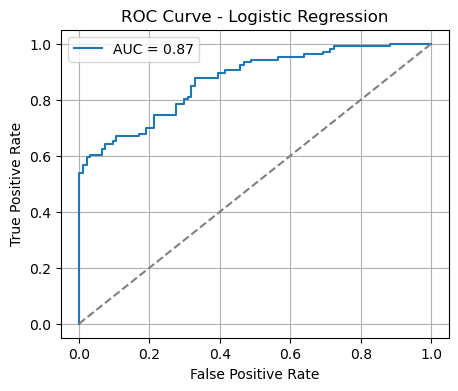

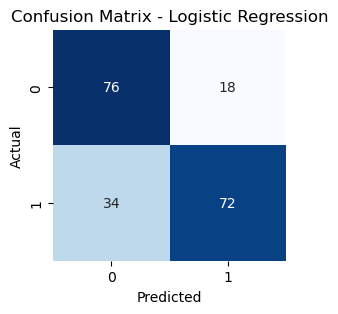

--------------------------------------------------------------------------------

Decision Tree:
              precision    recall  f1-score   support

           0       0.68      0.78      0.73        94
           1       0.77      0.68      0.72       106

    accuracy                           0.72       200
   macro avg       0.73      0.73      0.72       200
weighted avg       0.73      0.72      0.72       200

  AUC: 0.7279
  Accuracy: 0.7250
  F1 Score: 0.7236


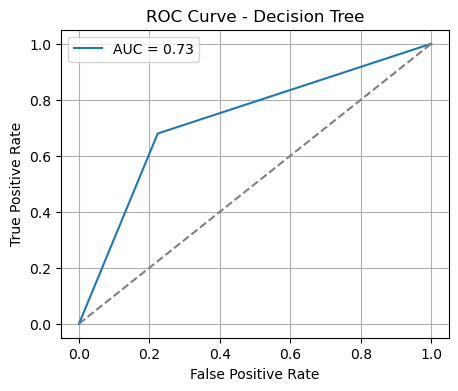

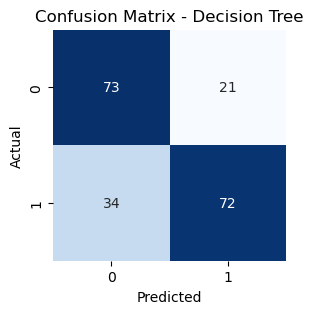

--------------------------------------------------------------------------------

Random Forest:
              precision    recall  f1-score   support

           0       0.70      0.87      0.78        94
           1       0.86      0.67      0.75       106

    accuracy                           0.77       200
   macro avg       0.78      0.77      0.76       200
weighted avg       0.78      0.77      0.76       200

  AUC: 0.8623
  Accuracy: 0.7650
  F1 Score: 0.7513


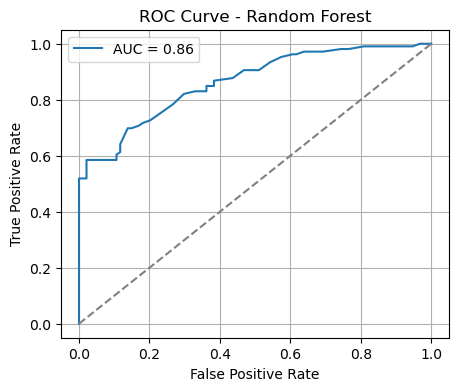

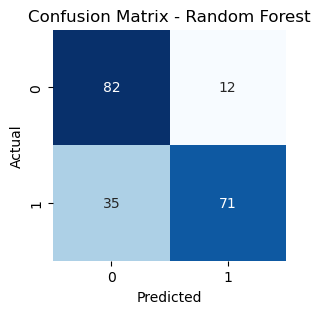

--------------------------------------------------------------------------------

KNN:
              precision    recall  f1-score   support

           0       0.58      0.72      0.64        94
           1       0.69      0.54      0.60       106

    accuracy                           0.62       200
   macro avg       0.63      0.63      0.62       200
weighted avg       0.64      0.62      0.62       200

  AUC: 0.6748
  Accuracy: 0.6250
  F1 Score: 0.6032


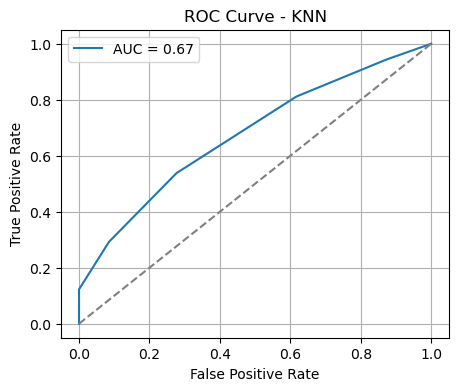

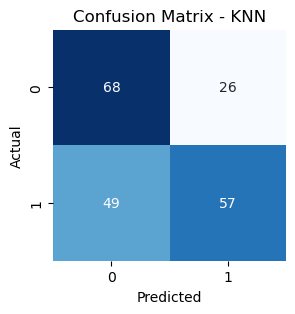

--------------------------------------------------------------------------------

Naive Bayes:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        94
           1       1.00      0.52      0.68       106

    accuracy                           0.74       200
   macro avg       0.82      0.76      0.73       200
weighted avg       0.83      0.74      0.73       200

  AUC: 0.8415
  Accuracy: 0.7450
  F1 Score: 0.6832


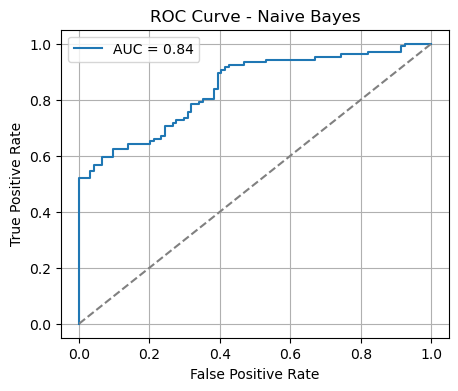

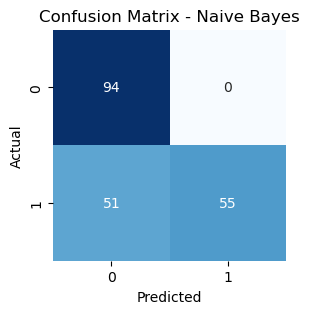

--------------------------------------------------------------------------------

XGBoost:
              precision    recall  f1-score   support

           0       0.71      0.83      0.76        94
           1       0.82      0.70      0.76       106

    accuracy                           0.76       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.76      0.76       200

  AUC: 0.8424
  Accuracy: 0.7600
  F1 Score: 0.7551


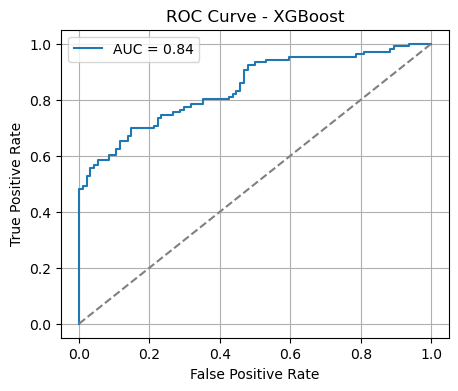

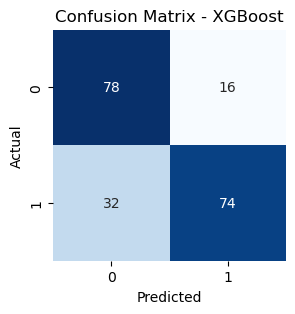

--------------------------------------------------------------------------------


In [97]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)

    auc = roc_auc_score(y_test, y_scores)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "AUC": auc
    })

    print(f"\n{name}:")
    print(classification_report(y_test, y_pred))
    print(f"  AUC: {auc:.4f}")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  F1 Score: {f1:.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend()
    plt.grid()
    plt.show()

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    print("-" * 80)

In [99]:
results_df = pd.DataFrame(results)

print(results_df.sort_values(by="AUC", ascending=False))

                 Model  Accuracy  F1 Score       AUC
0  Logistic Regression     0.740  0.734694  0.868928
2        Random Forest     0.765  0.751323  0.862304
5              XGBoost     0.760  0.755102  0.842433
4          Naive Bayes     0.745  0.683230  0.841530
1        Decision Tree     0.725  0.723618  0.727921
3                  KNN     0.625  0.603175  0.674829


<Figure size 1000x600 with 0 Axes>

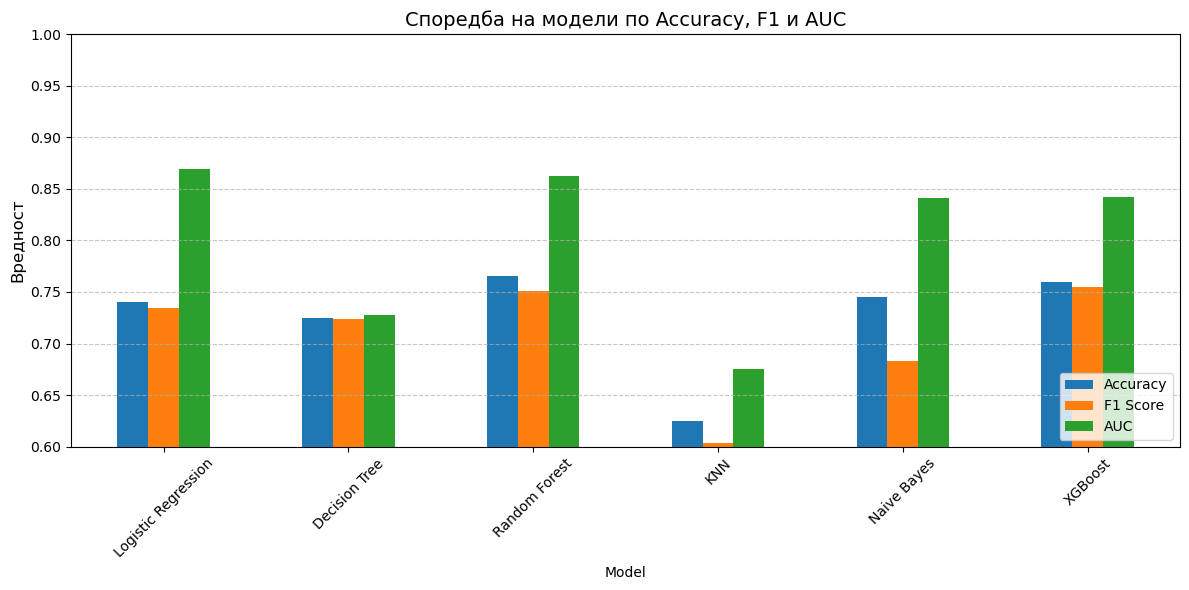

In [101]:
plt.figure(figsize=(10, 6))
results_df.set_index("Model")[["Accuracy", "F1 Score", "AUC"]].plot(kind="bar", figsize=(12, 6))
plt.title("Споредба на модели по Accuracy, F1 и AUC", fontsize=14)
plt.ylabel("Вредност", fontsize=12)
plt.ylim(0.6, 1.0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

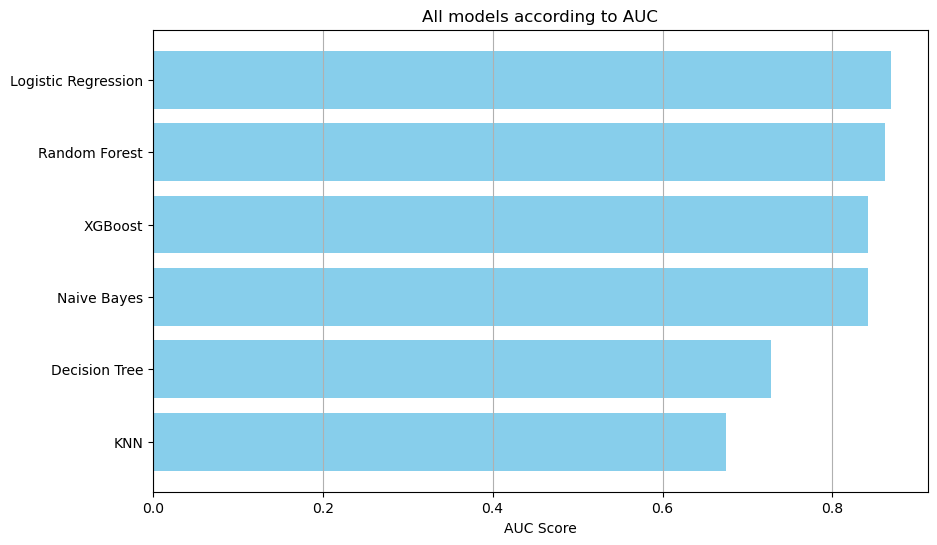

In [103]:
results_df = results_df.sort_values(by="AUC", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(results_df["Model"], results_df["AUC"], color='skyblue')
plt.xlabel("AUC Score")
plt.title("All models according to AUC")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()